# Predicting Customer Churn in Telecom: Data Driven Insights for Telecom Retention

## Business Understanding
In 2024, ABC Telecommunication Company, a startup telecom provider, reported a churn rate of approximately 26% out of its 6,978 active customers. This translated to about 1815 customers leaving within a year, which resulted in an estimated revenue loss of $2.4 million.

Analysis revealed that customers who churned were primarily on a month-to-month contracts and faced higher monthly charges compared to those who stayed.

The factors presumed to have contributed to the high churn rate include:
1. Lack of long-term contracts made it easy for custo,ers to switch to competition.
2. Highers service charges and presenxce of international calling plans which led to dissatisfaction.
3. Poor customer support ratings further reducing customer loyalty.

The challenge is to identify customers who are likely to churn and to uncover the main factors driving churn. This knowledge is critical for ABC Telecom to proactively develop and implement retention strategies, improve customer loyalty and minimize revenue loss.

### Problem Statement

ABC Telecommunication Company is experiencing a high churn rate of 26% resulting in a significant revenue loss of $2.4 million annually. This threatens the company's growth and long-term sustainability.

This project will help alleviate the problem by:
- Identifying customers who are likely to churn through predictive modeling.
- Uncovering the key factors driving churn, such as monthly charges, contract type and the quality of support services.
- Providing actionable insights that will enable the company to design targeted retention strategies, reduce churn and improve customer loyalty.

### Objectives

1. To identify the key factors that contribute to customer churn in the telecom industry.
2. To predict the likelihood of churn using various Machine Learning models.

### Metric of Success

The project will be considered successful if it can:

1. Identify the key factors that contribute to customer churn ABC Telecom.
2. Build a predictive model with strong performance on the test dataset.
3. Meet or exceed the following target metrics;
- Accuracy >= 80% on condition that, other metrics score well because of class imbalance in our target variable.
- Recall >= 80% . The model should correctly identify the majority of churners which is important for retention.
- Precision >= 50% . The model should predict churn with atleasr half being true churners to avoid too many false alarms.
- F1-Score >= 0.65. This provides a balance between precision and recall.
- ROC-AUC >= 0.75 to measure the models ability to distinguish churnes and non-churners across thresholds.


## Data Undestanding

To explore what drives customer churn in the telecom industry, we are using `SyriaTel Customer Churn` dataset from Kaggle. This dataset contains 3333 customer records and 21 features, capturing customer-level information such as usage and charges, customer service calls, international and voicemail plans and churn behavior.

Below is an overview of the dataset and the structure of the data it contains.

1. `state`: The U.S. state where the customer lives.
2. `account length`: Duration (in months) the customer has had the account.
3. `area code`: The telephone area code of the customer.
4. `phone number`: Customer's phone number(acts as identifier-not useful for prediction).
5. `international plan`: Whether the customer has an international calling plan(yes or no)
6. `voicemail plan`: Whether the customer has a voicemail plan(yes or no)
7. `number vmail messages`: Number of voicemail messages.
8. `total day minutes`: Total minutes of calls made during the day.
9. `total day calls`: Total number of calls made during the day.
10. `total day charge`: Total charge for day calls (minutes * rates)
11. `total eve minutes`: Total minutes of calls made during the evening.
12. `total eve calls`: Total number of calls made during the evening.
13. `total eve charge`: Total charge for evening calls (minutes * rates)
14. `total night minutes`: Total minutes of calls made during the night.
15. `total night calls`: Total number of calls made during the night.
16. `total night charge`: Total charge for night calls (minutes * rates)
17. `total intl minutes`: Total minutes of international calls.
18. `total night calls`: Total number of international calls made.
19. `total night charge`: Total charge for international calls(minutes * rates)
20. `customer service calls`: Number of times the customer called customer service.
21. `Churn`(Target variable): Whether the customer left the company(1 = churn) or stayed(0 = churn)

This dataset enables us to analyze customer behaviors, identify churn patterns and prepare features for building predictive models.

#### Data Relevance

The dataset is relevant because its features directly relate to factors influencing **customer churn** in the telecom industry. For Example:
- **Usage and charges** features(e.g, total day minutes, total eve calls, total night charge) provide measurable insights into customer behavior and spending patterns.
- **Customer service calls** is a practical indicator of dissatisfaction and a strong link to churn.
- **International and voicemail plan** features capture optional services that may affect customer satisfaction and churn decisions.
- **Churn**, the target variable (0 = stayed, 1 = left) is aligned with business objective of predicting customer loss.

Overall, this dataset provides valid and industry-relevant features which make it highly suitable for analyzing churn behavior and building predictive models to address the company's business problem.

In [660]:
# Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import re 

# Import sklearn libraries 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTEN 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [661]:
# Loading and reading the first five rows of the dataset
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [662]:
# Checking the last five rows of the dataset
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


The dataset values are uniform from top to bottom

In [663]:
# Checking the shape
print(f"The dataset has {data.shape[0]} customer records with {data.shape[1]} features")

The dataset has 3333 customer records with 21 features


In [664]:
# Checking for general information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset comprises of 16 numerical features and 4 categorical features and 1 boolean target feature-Churn.

In [665]:
# Checking for statistical summary
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Observation.
The dataset contains 3333 customers.
- On average, most customers stays for approximately 101 days, some stayed only for a day while others stayed for 243 days.
- Usage is  highest in the evening and night with an average usage of approximately 201 minutes.
- However, day usage has lower average mean at 180 minutes and the charges compared to evening and night for the calls are higher, making it a potential churn factor.
- Voicemail is rarely used, having a median of 0 messages. 
- International calls also are not frequent as seen above, with a mean number of calls at around 4 and a maximum of 20 calls and the mean minutes at approximately 10 minutes and maximum of 20. Customers with international plans may be prone to churn as well.
- Customer service calls average 1.5 calls. Some customers contact support up to 9 times as seen, indicating high risk of churn.

In [666]:
# Checking statistical summary of categorical features
data.describe(include="object")

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,400-4344,no,no
freq,106,1,3010,2411


Observation
- There are 51 states covered with West Virginia-WV being the most frequent with 106 customers. The number is quite small suggesting that no state dominates much.
- Phone number is a personal identifier and unique per customer, hence will be excluded during modeling.
- International plan is highly imbalanced, with 90% of the customers who have not subscribed to it.Billing costs for international plans are always high and may be the reason to low subscription, hence a strong churn predictor.
- Voice mail plan is also imbalanced with 72% of the customers having not subscribed to it. However, they are less likely to churn because, customers who use voicemail are typically more engaged since they have additional services beyond basic calling, and may face higher switching costs if they leave.

In [667]:
# Checking count of boolean datatype and also the target faeature
data["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

Observation
- The target variable `churn` tells us whether the customer discontinued using the services or not.
Out of 3333 customers 483(14.5%) churned and 2850(85.5%) stayed, suggesting that churn events are relatively low and should be accounted for in modeling to avoid bias towards the majority class.

In [668]:
# Checking the unique values
for col in data.columns:
    unique_values = data[col].unique()
    print(f"{col}\n, {unique_values}\n")


state
, ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account length
, [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 

## Data Preparation
### Data cleaning

In [669]:
# Creating a copy 
df = data.copy(deep=True)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [670]:
# Removing whitespaces in column names
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [671]:
# Checking for duplicates and missing values
print(df.duplicated().sum())
print(df.isna().sum())

0
state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


Observation.
- The dataset is fairly clean and has no duplicates.

In [672]:
# Replacing white spaces with _
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [673]:
# Dropping phone number, area code
df.drop(["area_code", "phone_number", "state"], axis=1, inplace=True)

# Recheck column names
df.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

In [674]:
# Encoding categorical features
df["international_plan"] = df["international_plan"].map({'yes':1, 'no':0})
df["voice_mail_plan"] = df["voice_mail_plan"].map({'yes':1, "no":0})
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [675]:
# Recheck churn value counts and percentage
churn_dist = df["churn"].value_counts(normalize=True)*100
churn_dist = churn_dist.round(1)
churn_dist

churn
False    85.5
True     14.5
Name: proportion, dtype: float64

In [676]:
# Convert churn to interger False-0, False-1
df["churn"] = df["churn"].astype(int)
df[:3]

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


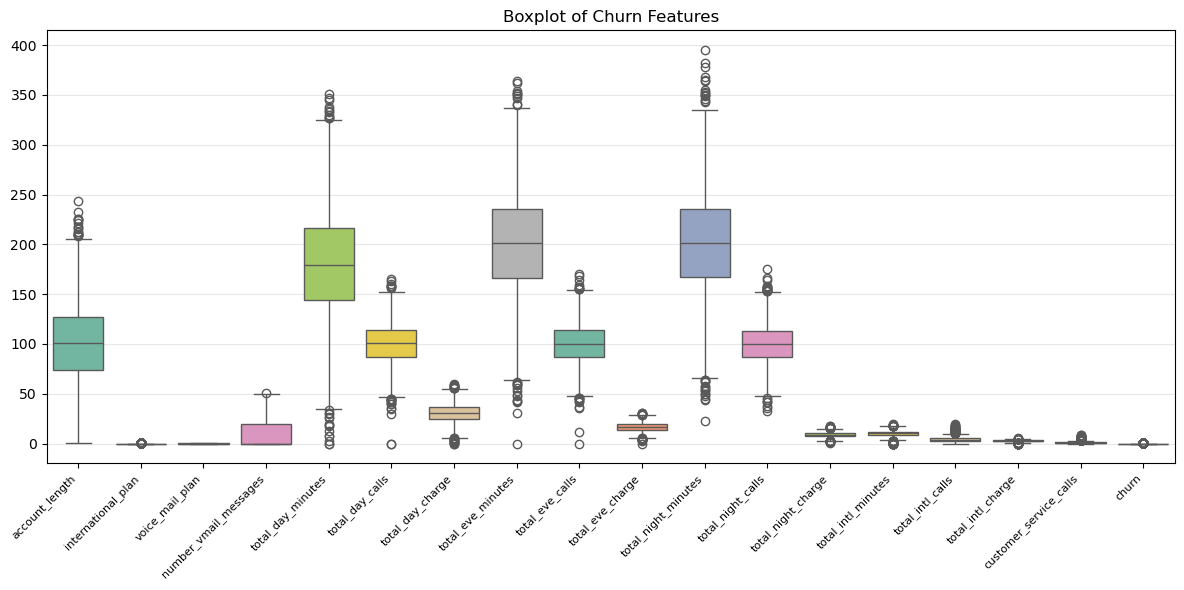

In [677]:
# Check for outliers
plt.figure(figsize=(12,6))
sns.boxplot(df, palette="Set2")
plt.title("Boxplot of Churn Features")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(axis="y", alpha=.3)
plt.tight_layout()
plt.show()

Observation
- The outliers in this dataset are genuine, so we will not remove them.

For example,
- Values in `account_length` are valid and indicate that some customers are highly loyal.
- High and low usage is expected, since some customers barely use the services while others are heavy users.

In [678]:
df.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

## Exploratory Data Analysis
### Univariate Analysis
- Univariate Analysis aims to explore each feature individually, to understand its patterns, distribution and potential impact on customer churn, using appropriate visualizations. 
- We will analyze the following features in our telecom dataset to understand their characteristics and influence on churn:
1. **Churn rate distribution** - To examine the proportion of customers who churned versus those who stayed.
2. **Account Length** -The number of months a customer has been with the company, to see if longer-tenure customers are less likely to churn.
3. **Usage and charges during day, evening and night** - To analyze their patterns and distribution.


1. **Target variable: Churn**

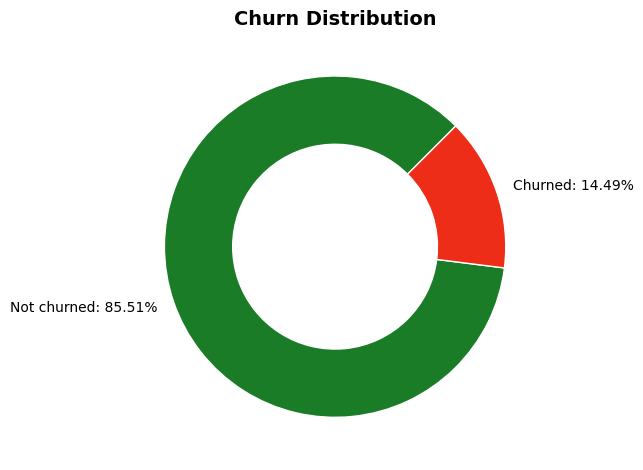

In [679]:
churn_dist = df["churn"].value_counts(normalize=True)*100
not_churned = churn_dist[0].round(2)
churned = churn_dist[1].round(2)
label = [f"Not churned: {not_churned}%", f"Churned: {churned}%"]
plt.pie([not_churned, churned], labels=label, wedgeprops=dict(width=.4, edgecolor="white"), colors=["#1a7c26","#ed2d17"], startangle=45 )
plt.title("Churn Distribution", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Most of the customers stay with the company, while a smaller portion leave.
- This indicates an imbalanced target and this will be considered when building predictive models.

2. **Account Length**

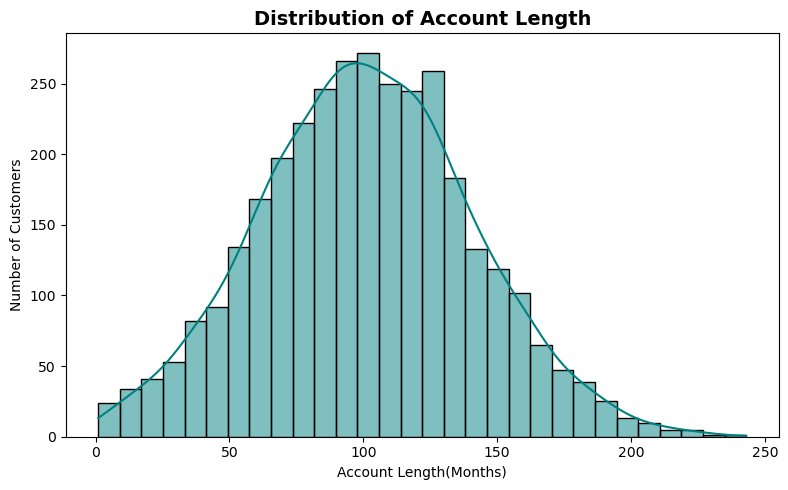

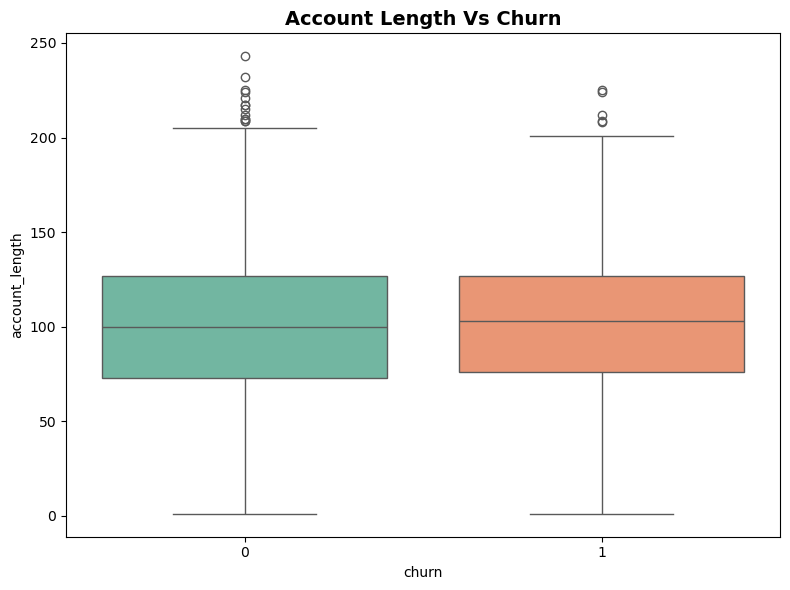

In [680]:
plt.figure(figsize=(8,5))
sns.histplot(df["account_length"], bins=30, kde=True, color="Teal")
plt.title("Distribution of Account Length", fontsize=14, weight="bold")
plt.xlabel("Account Length(Months)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="churn", y="account_length", data=df, palette="Set2")
plt.title("Account Length Vs Churn", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

Observation 
- Account length is fairly distributed.
- Customers who churn tend to have slightly shorter tenure, suggesting longer-tenured customers are more loyal

3. **Usage and Charges(Day, Evening and Night**)

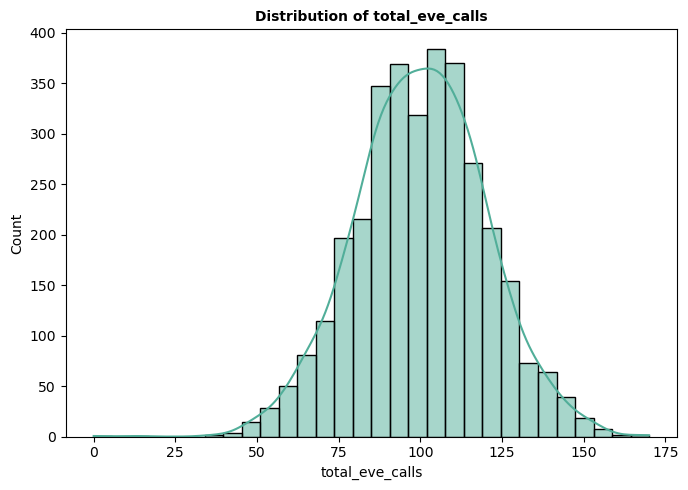

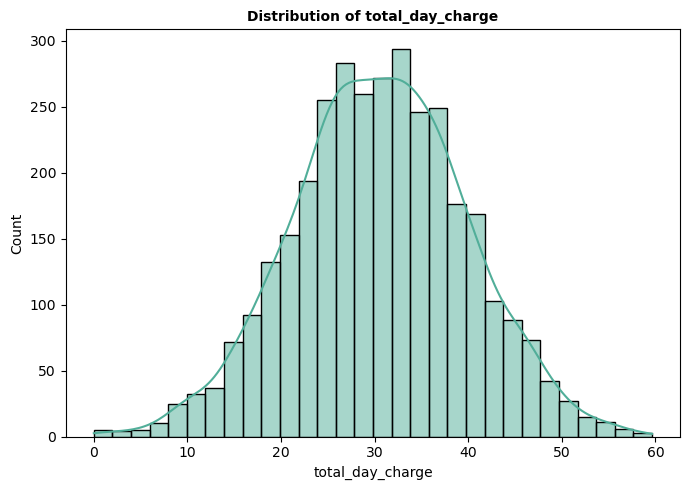

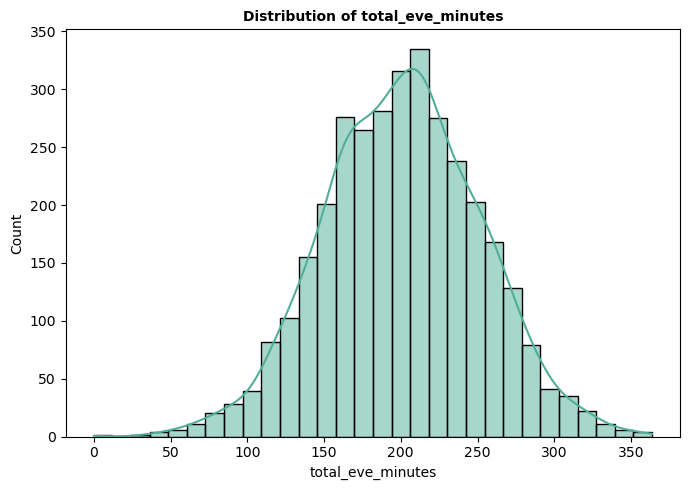

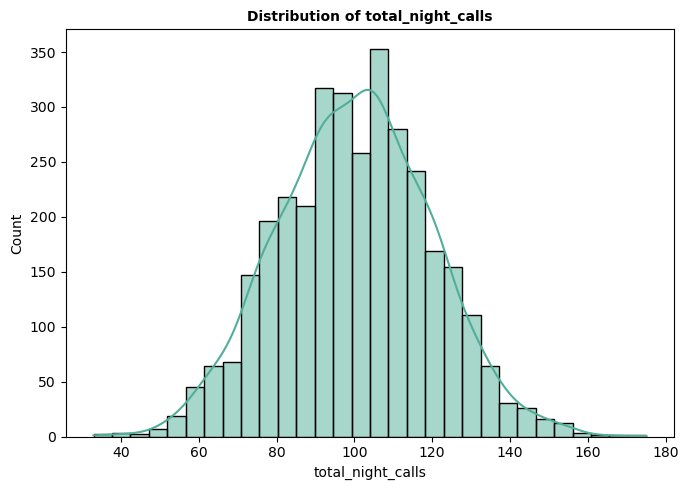

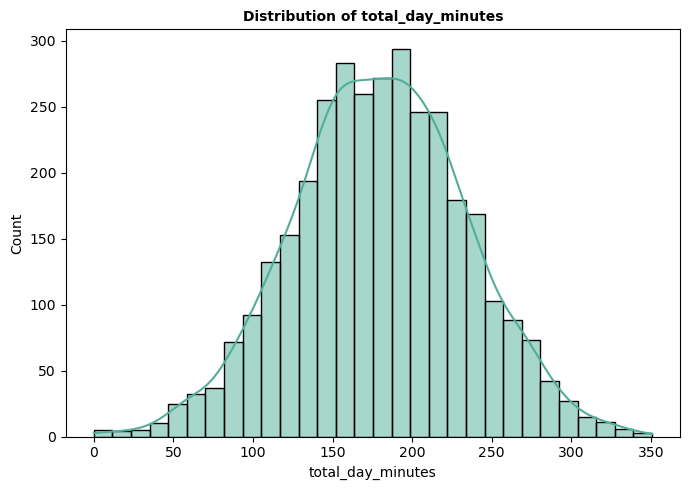

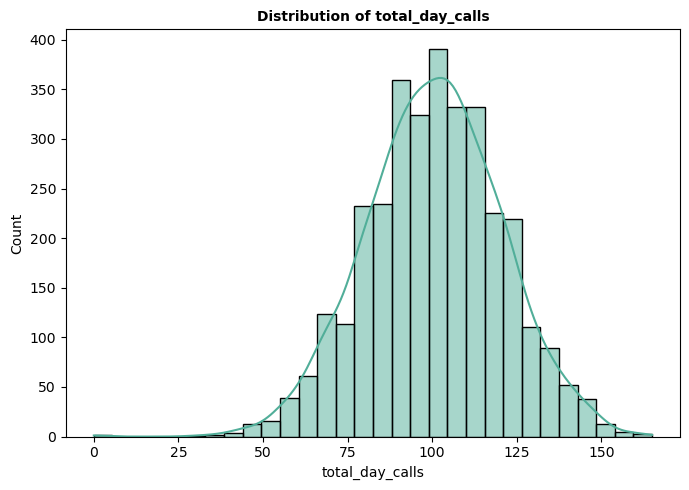

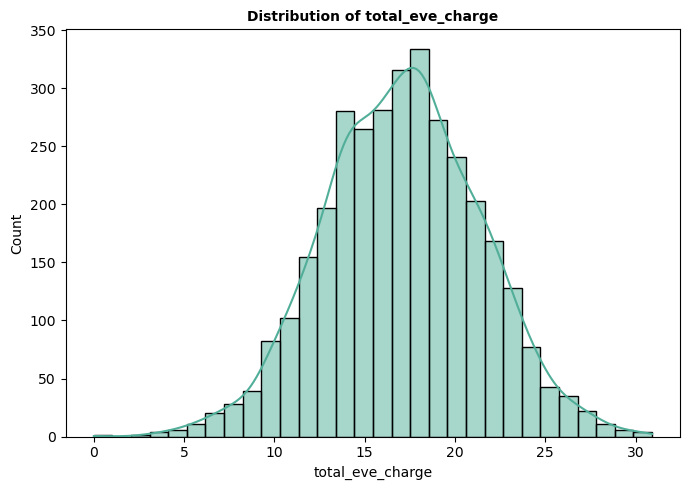

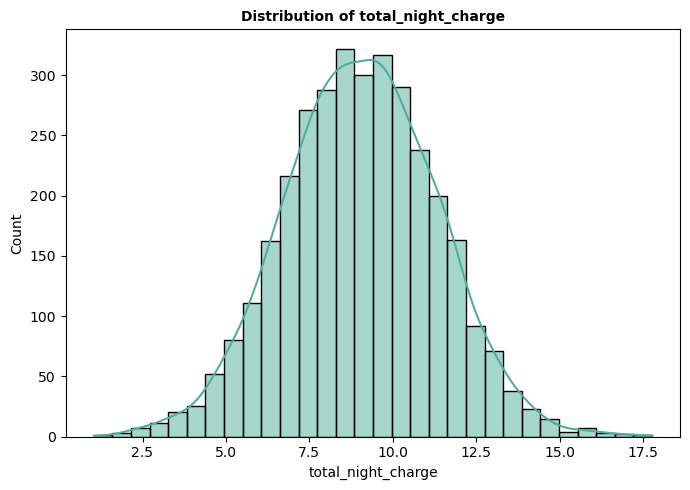

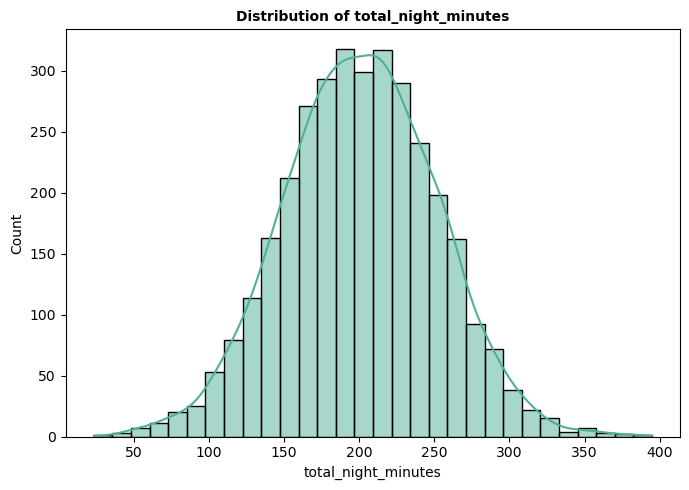

In [681]:
uc_features = {"total_day_minutes", "total_day_calls", "total_day_charge",
              "total_eve_minutes", "total_eve_calls", "total_eve_charge",
              "total_night_minutes", "total_night_calls", "total_night_charge"}

for i in uc_features:
    plt.figure(figsize=(7,5))
    sns.histplot(df[i], bins=30, kde=True, color="#51ae99")
    plt.title(f"Distribution of {i}", fontsize=10, weight="bold")
    plt.tight_layout()
    plt.show()

Observation
- Charges in real sense, follow usage(number of calls and minutes) trends. High usage indicate high cost.

### Bivariate Analysis
Bivariate analysis aims to explore the relationship between two features to identify patterns, trends and factors that are more strongly correlated with churn.

We will focus on the following key bivariate relationship in our telecom dataset:
1. **Churn versus international and Voicemail plans**.
2. **Churn versus usage and charges** - We will determine whether usage and charges during day, evening and night are linked to churn.
3. **Customer Service Calls versus Churn** 
4. **Correlation of Numeric Features with Churn** and which may serve as predictors

1. Churn Versus International and Voice plans

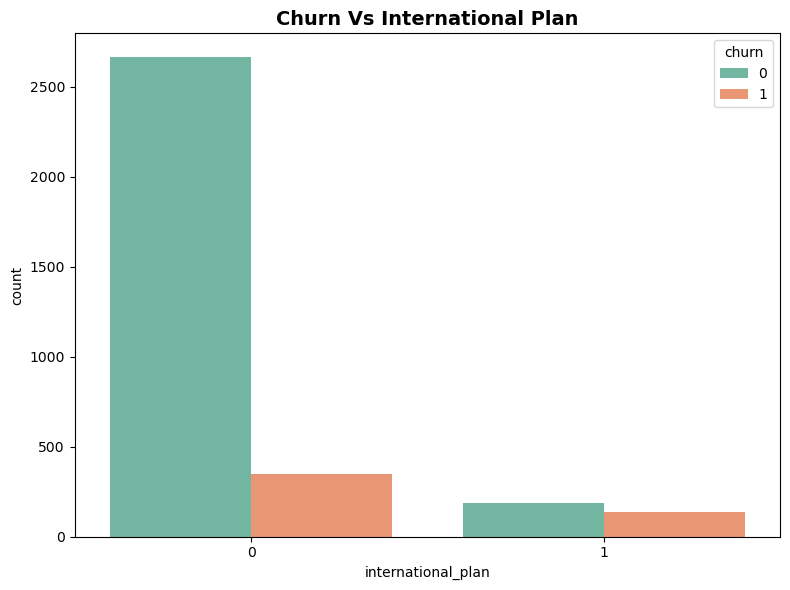

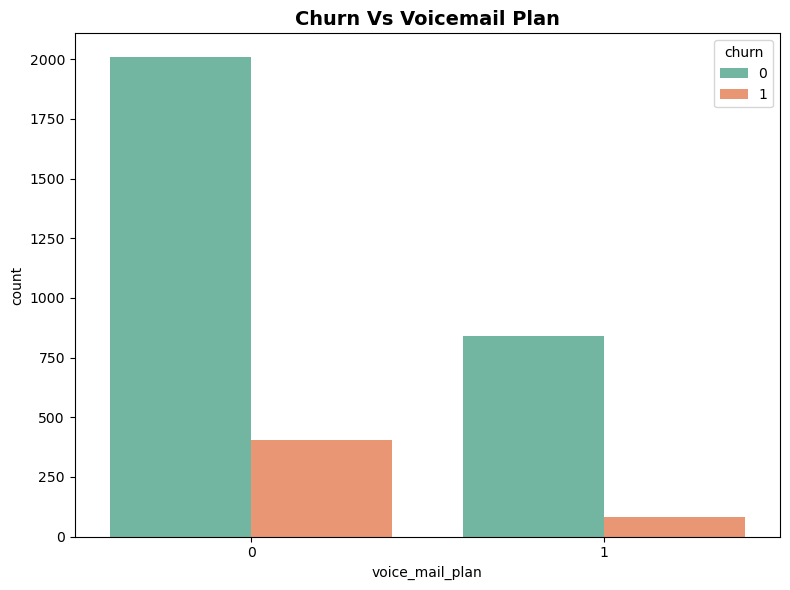

In [693]:
plt.figure(figsize=(8,6))
sns.countplot(x="international_plan", hue="churn", data=df, palette="Set2")
plt.title("Churn Vs International Plan", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x="voice_mail_plan", hue="churn", data=df, palette="Set2")
plt.title("Churn Vs Voicemail Plan", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Customers with international plan have a significantly higher likelihood of churning compared to those without. This may suggest that international plan users may be sensitive to costs or experience dissatisfaction leading to churn.
- Having a voicemail plan does not show much effect on churn.

2. **Churn verses Usage and Charges**

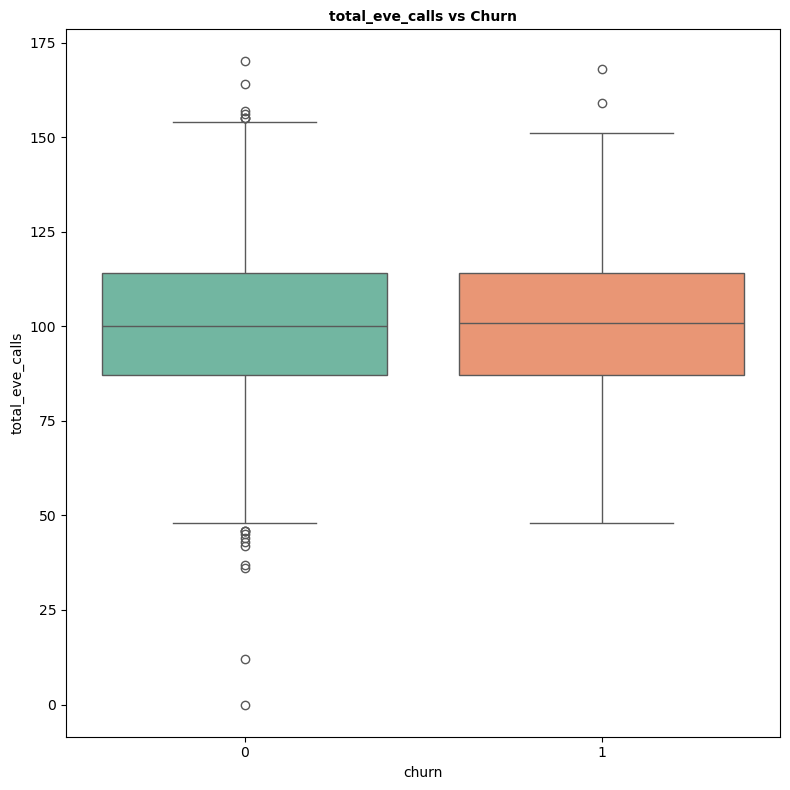

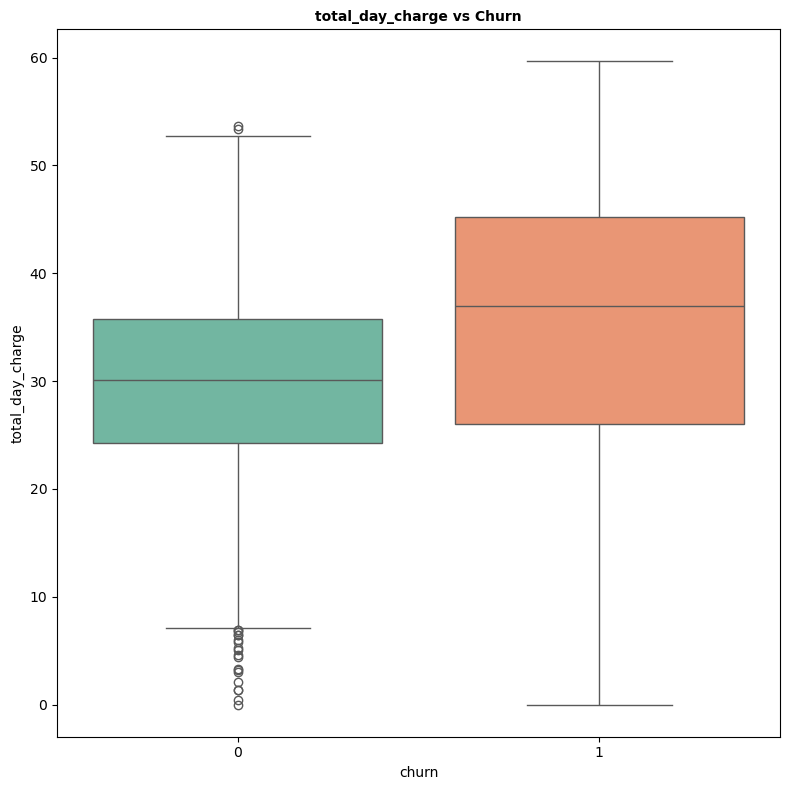

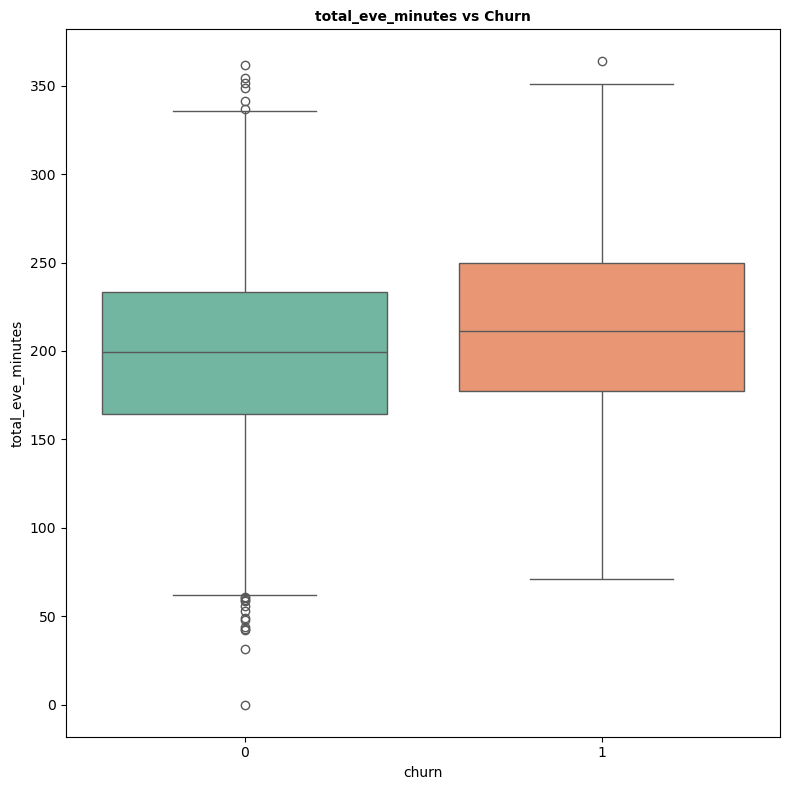

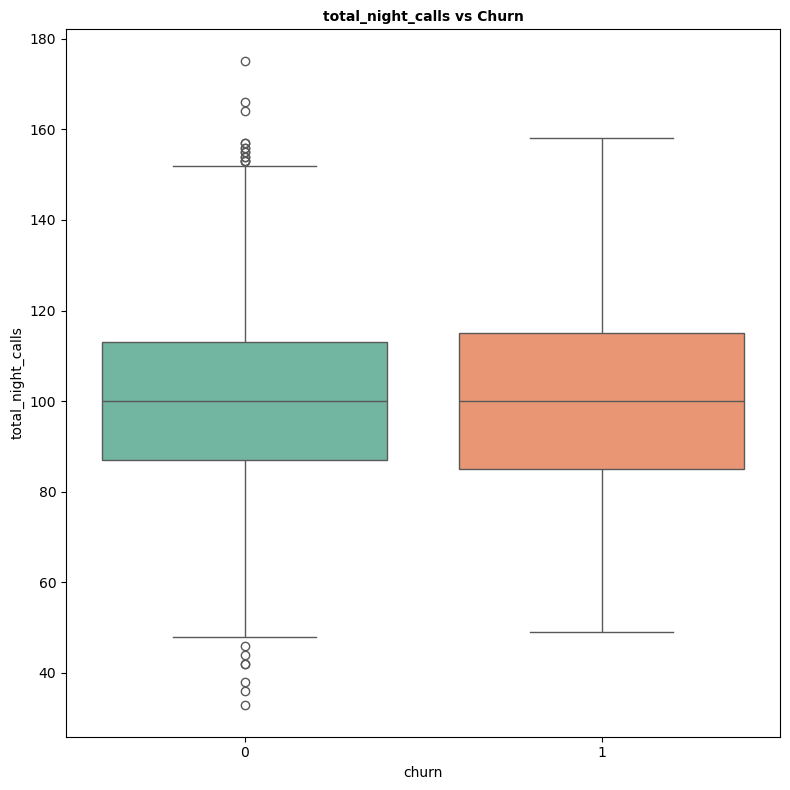

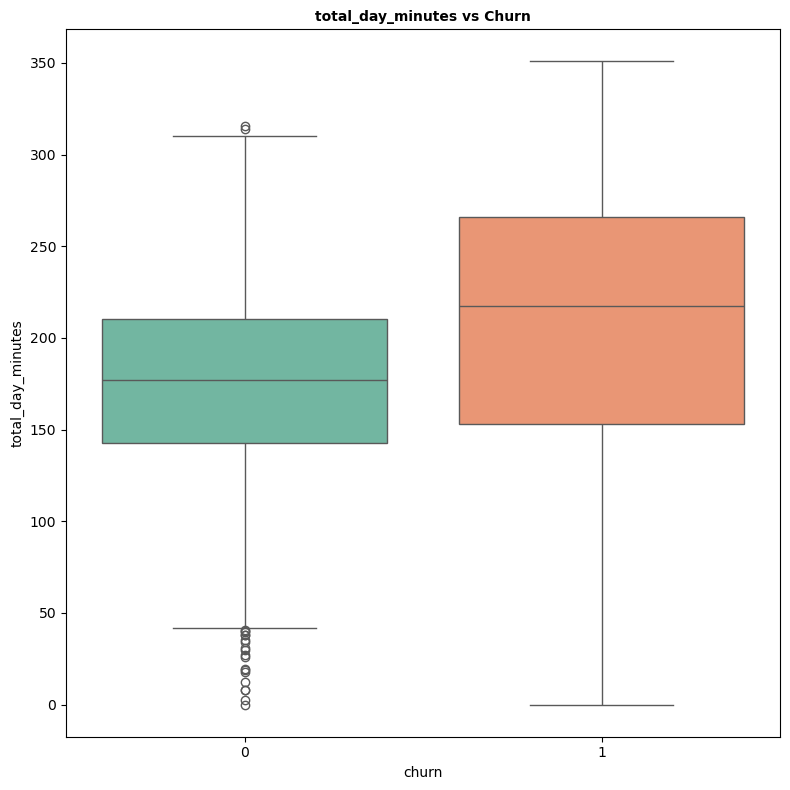

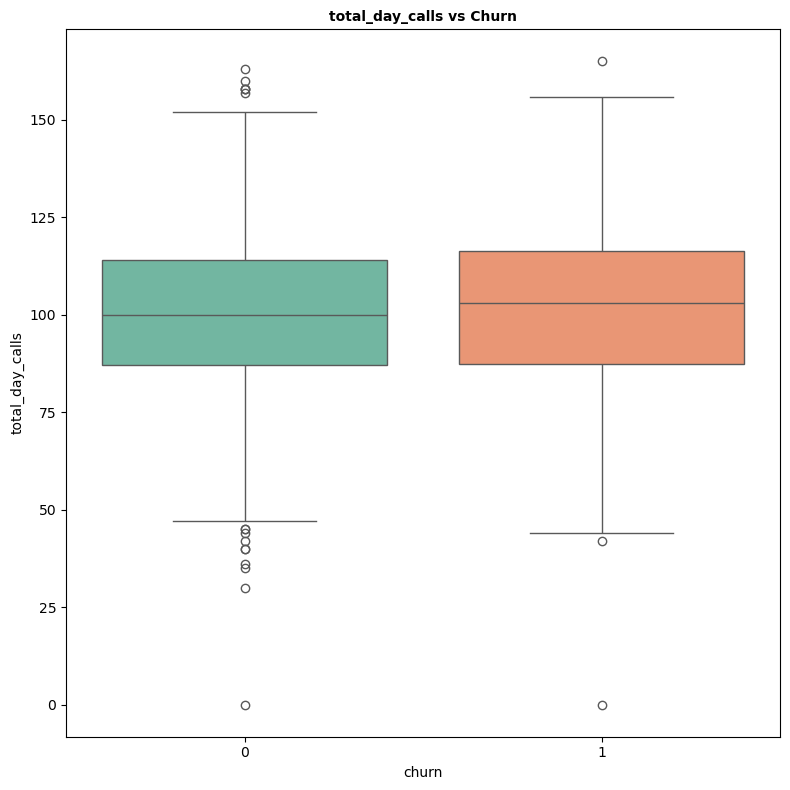

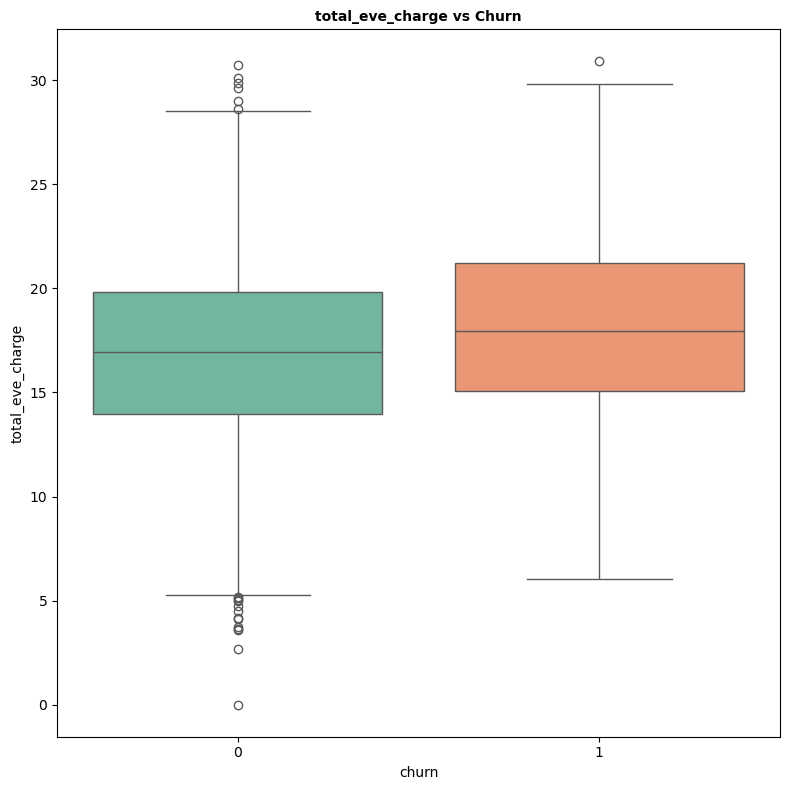

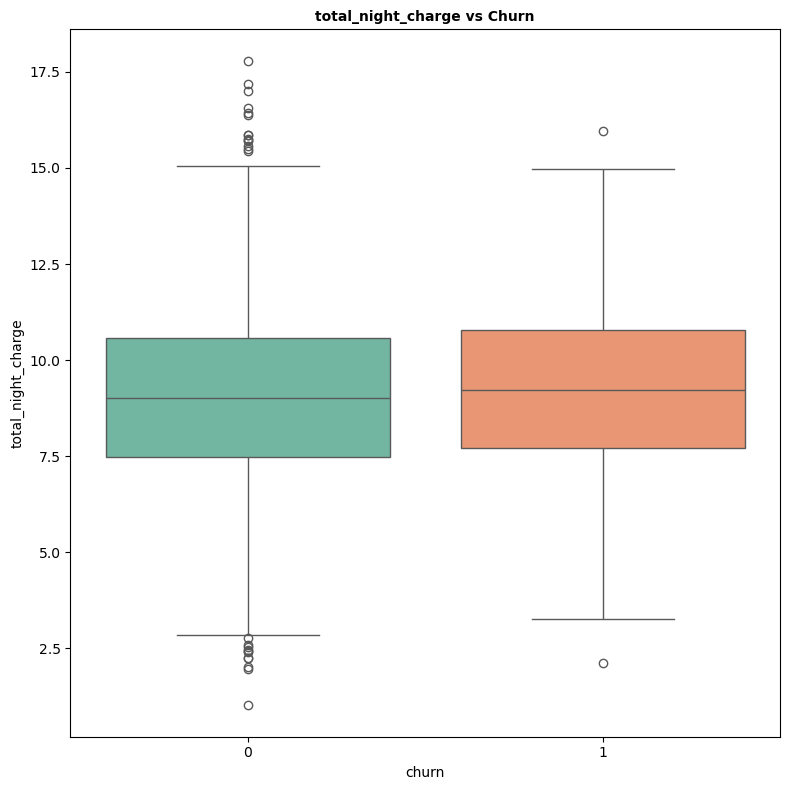

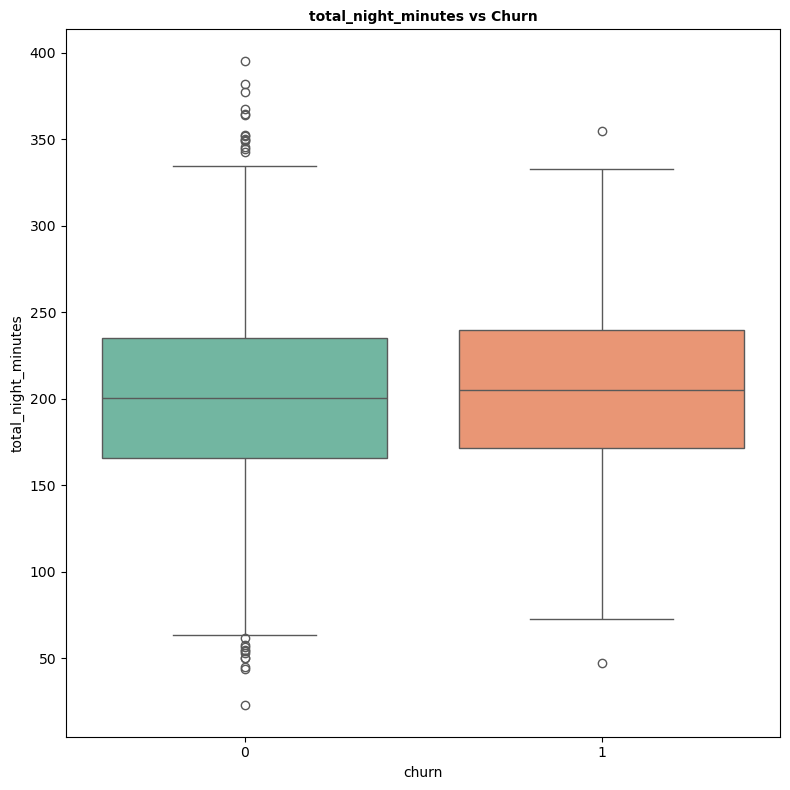

In [694]:
uc_features = {"total_day_minutes", "total_day_calls", "total_day_charge",
              "total_eve_minutes", "total_eve_calls", "total_eve_charge",
              "total_night_minutes", "total_night_calls", "total_night_charge"}

for i in uc_features:
    plt.figure(figsize=(8,8))
    sns.boxplot(x="churn", y=i, data=df, palette="Set2")
    plt.title(f"{i} vs Churn", fontsize=10, weight="bold")
    plt.tight_layout()
    plt.show()

Observation 
- Customers who churn tend to have higher day and evening usage but slightly lower usage at night.


3. **Customer Service Calls versus Churn**

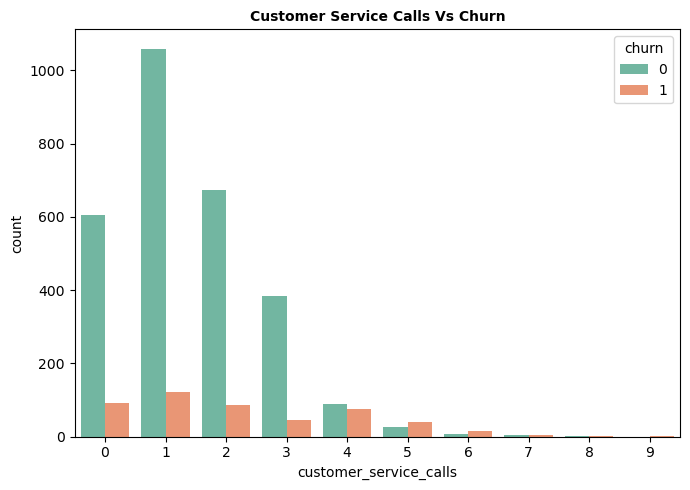

In [695]:
plt.figure(figsize=(7,5))
sns.countplot(x="customer_service_calls", hue="churn", data=df, palette="Set2")
plt.title("Customer Service Calls Vs Churn", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Customers who make more customer service calls are more likely to churn, indicating that frequent service issues contribute to dissatisfaction.

4. **Correlation of features with Churn**

In [696]:
df.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

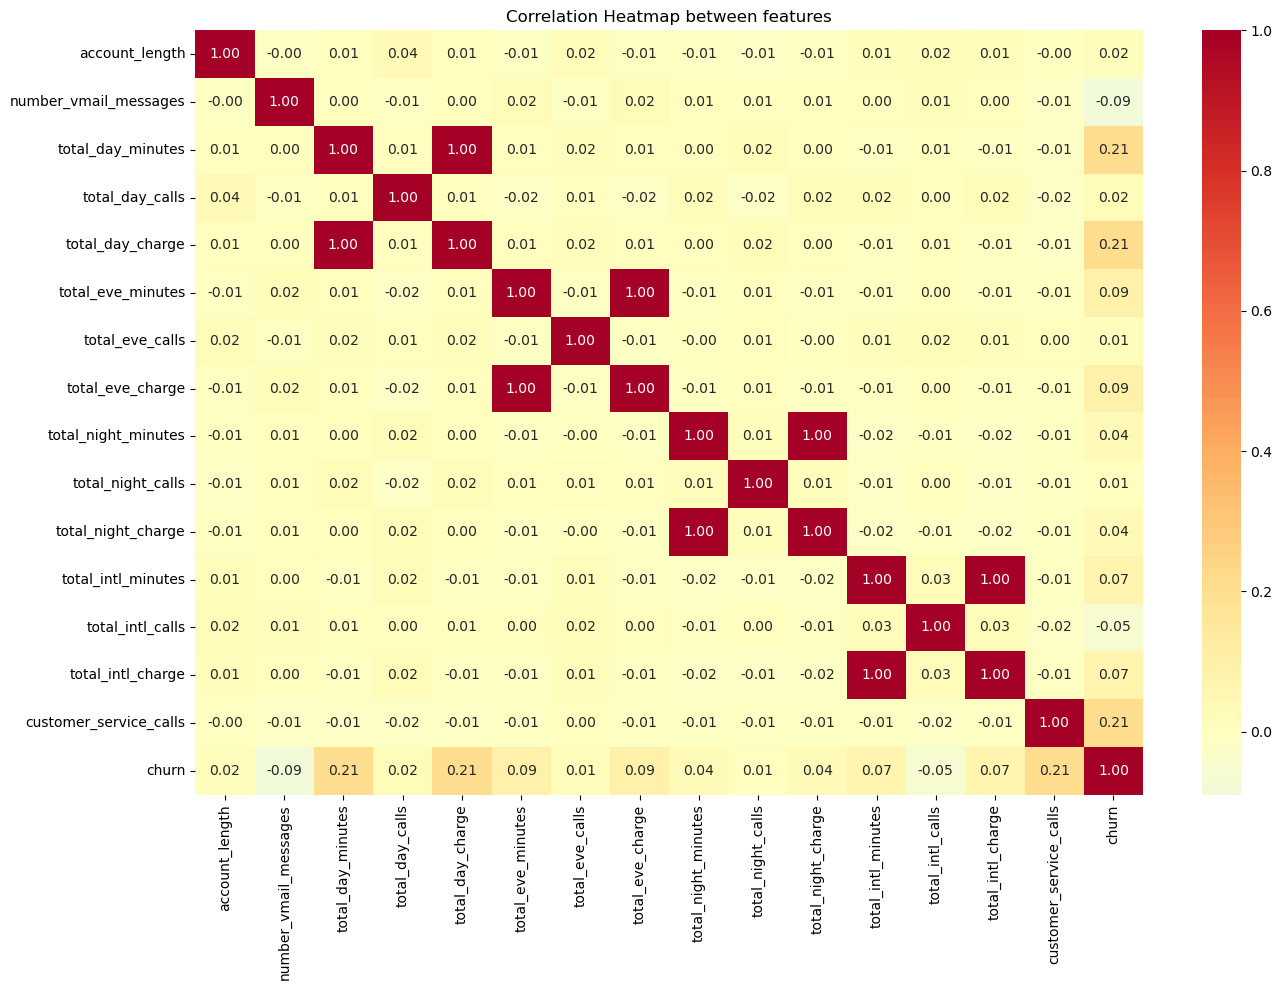

In [697]:
features = ["account_length", "number_vmail_messages", "total_day_minutes", "total_day_calls",
       "total_day_charge", "total_eve_minutes", "total_eve_calls",
       "total_eve_charge", "total_night_minutes", "total_night_calls",
       "total_night_charge", "total_intl_minutes", "total_intl_calls",
       "total_intl_charge", "customer_service_calls", "churn"]

corr = df[features].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlBu_r", center=0)
plt.title("Correlation Heatmap between features")
plt.tight_layout()
plt.show()


Observation
- Features like `customer_service_calls`, `total_day_minutes`, `total_day_charge`, show a positive correlation with churn, indicating higher usage or more service calls may increase the likelihood of churn.
- There is a strong correlation between usage and charge features `total_day_charge` and `total_day_minutes`, ``total_eve_charge` and `total_eve_minutes`,`total_night_charge` and `total_night_minutes`, 
`total_intl_charge` and `total_intl_minutes`, but these features show only weak correlation with churn individually, likely due to multicollinearity and interaction with other factors.
- The target variable `churn` is imbalanced, so correlation with numeric features are naturally smaller.
- Outliers in usage and charge features can also reduce correlation values.
- Lower correlation does imply that feature is unimportant for predicting churn. Non linear relationship exists in this dataset.Feature importance analysis during modeling will help capture these effects.

### Multivariate Analysis
The goal in multivariate analysis is to explore interactions between multiple features and their influence on churn.

1. **Customer Service Calls vs International Plan vs Churn**

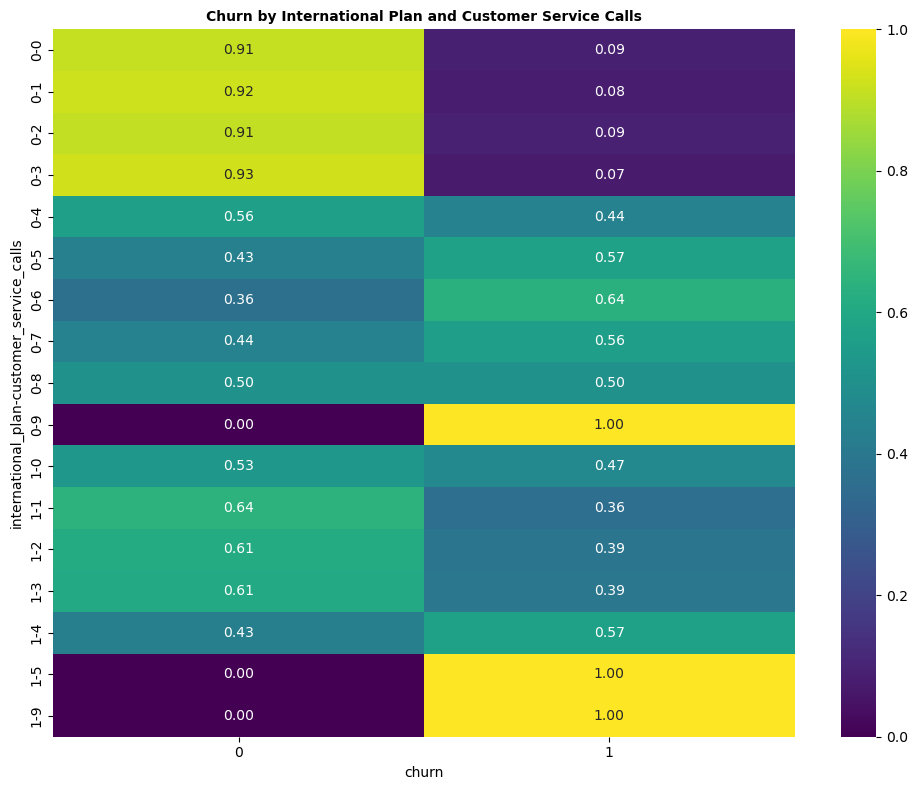

In [706]:
pivot = pd.crosstab([df["international_plan"], df["customer_service_calls"]], df["churn"], normalize="index")

plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Churn by International Plan and Customer Service Calls", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Segments with international plan + multiple service calls show higher churn probabilities.

2. **Usage versus Plan Type versus Churn**

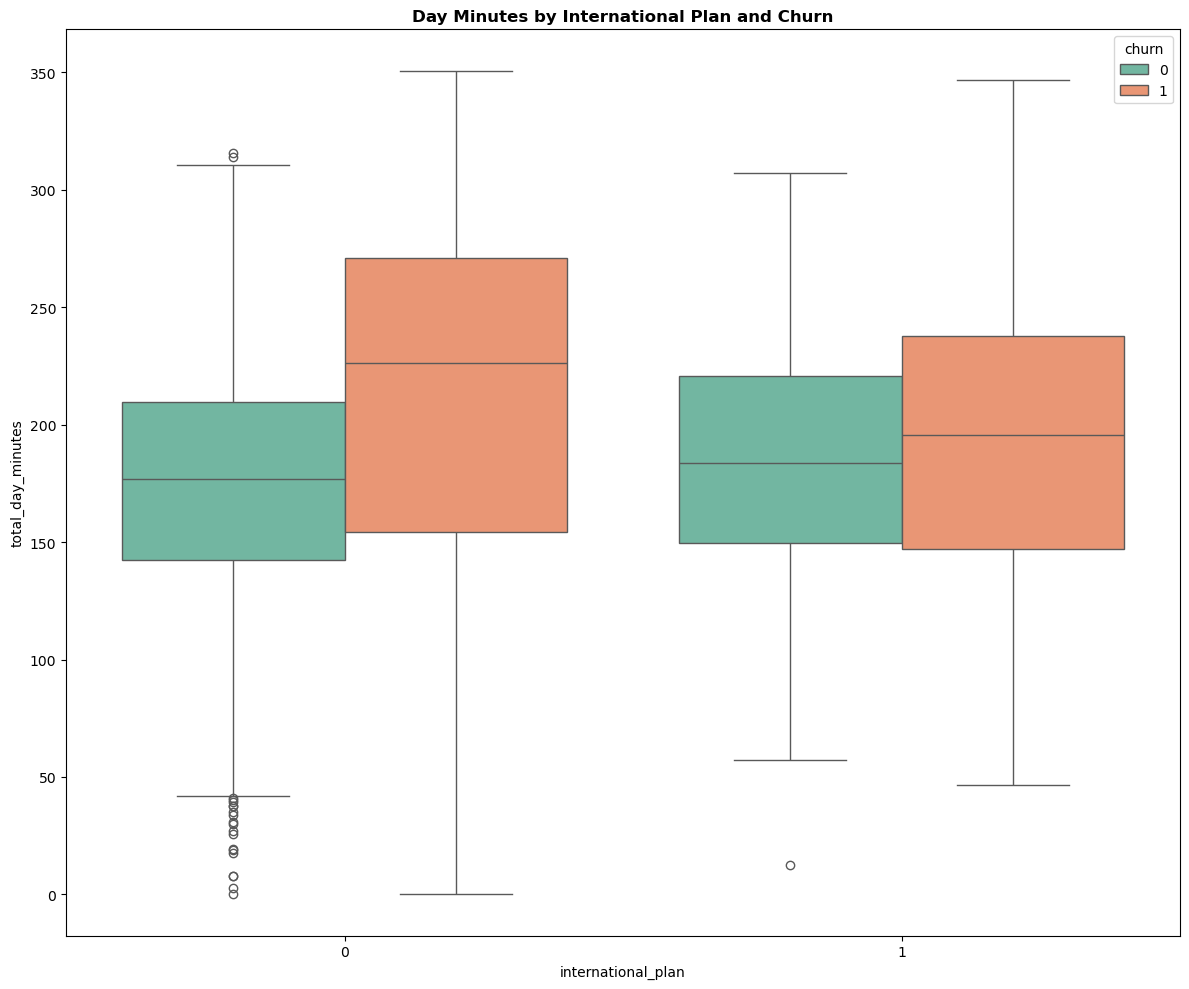

In [707]:
plt.figure(figsize=(12,10))
sns.boxplot(x="international_plan", y="total_day_minutes", hue="churn", data=df, palette="Set2")
plt.title("Day Minutes by International Plan and Churn", fontsize=12, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Churned customers with an international plan tend to have higher day usage compared to non-churned customers.

3. **Using pairplot to visualize multiple features with churn to spot clusters**

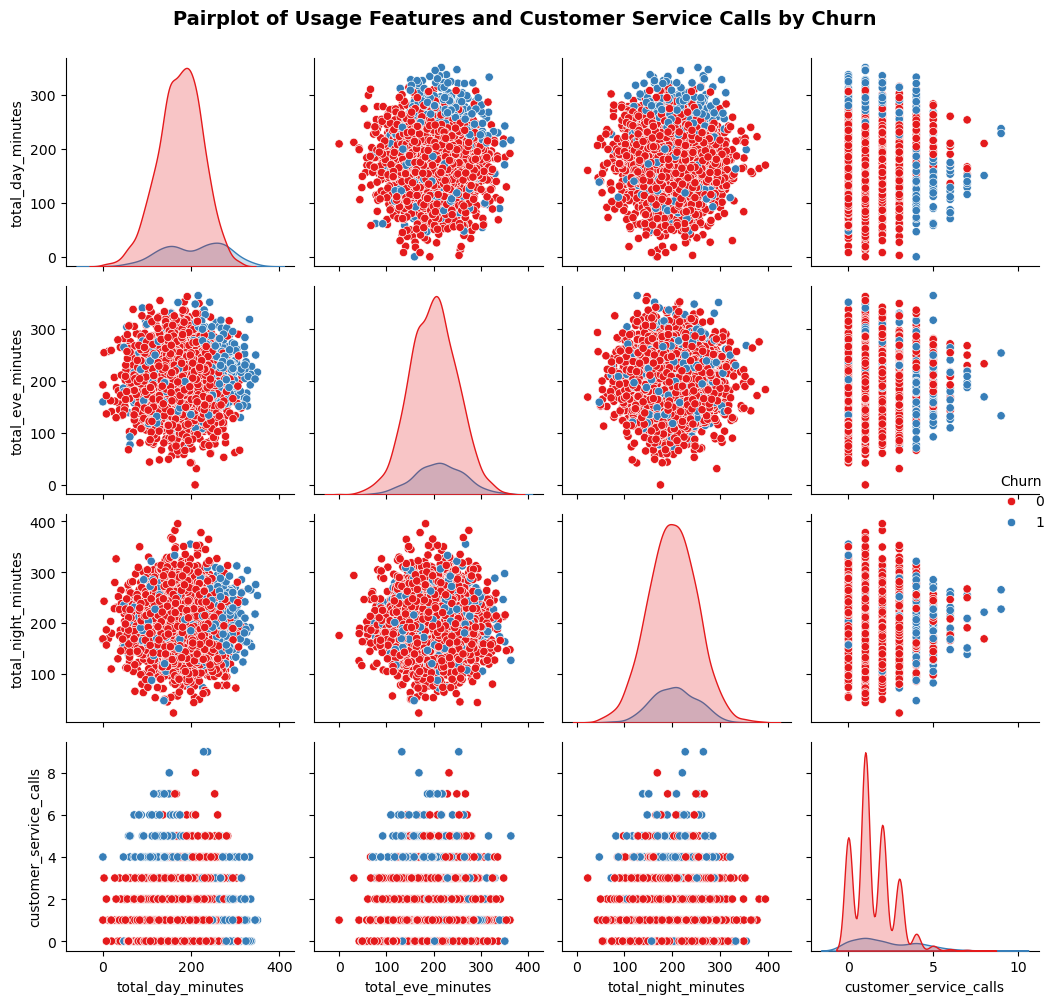

In [718]:
pairplot = sns.pairplot(df, vars=["total_day_minutes", "total_eve_minutes", "total_night_minutes", "customer_service_calls"], hue="churn", palette="Set1", diag_kind="kde")
pairplot._legend.set_title("Churn")
plt.subplots_adjust(top=1)
pairplot.fig.suptitle("Pairplot of Usage Features and Customer Service Calls by Churn", fontsize=14, weight="bold", y=1)
plt.tight_layout()
plt.show()

Observation

**Note**: `Churned customers` are those in `blue` dots and `non-churned customers` in `red` dots.
- Churned Customers are clustered in high usage + high service call regions, while non-churned customers are more spread out in lower usage and fewer service calls areas.

**Recommendations**

Following the Exploratory Data Analysis(EDA), the following steps are recommended before proceeding to modeling:

1. **Address Multicollinearity** to reduce redundancy by combining highly correlated features like usage and charge features, or use Tree based models(e.g, Random Forest, XGBoost) that handles it naturally.
2. **Retain genuine outliers**. Outliers observed in usage and service call features reflect real customer behavior and carry important signals for churn prediction.
3. **Feature engineering** to generate interaction features to capture non-linear effects and enhance predictive power.Binning extreme values into categories to capture churn behavior better.
4. **Cross Validation**. Implement stratified K-fold Cross Validation to ensure robust model evaluation and deal with class imbalances.
